In [1]:
#import the package
from spectral import *

#importing the datasets
img = open_image('92AV3C.lan')

In [2]:
img.__class__

spectral.io.bilfile.BilFile

In [3]:
print(img)

	Data Source:   '.\.\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16


In [4]:
img.shape

(145, 145, 220)

In [5]:
pixel = img[50,100]

In [6]:
pixel.shape

(220,)

In [7]:
bands = img[:,:,5]

In [8]:
bands.shape

(145, 145, 1)

In [9]:
#loading entire image
arr = img.load()
arr.__class__

spectral.image.ImageArray

In [10]:
print(arr.info())

	# Rows:            145
	# Samples:         145
	# Bands:           220
	Data format:   float32


In [11]:
arr.shape

(145, 145, 220)

In [12]:
#for showing the HSI data
view = imshow(img,(29,19,91))

In [13]:
print(view)

ImageView object:
  Display bands       :  (29, 19, 91)
  Interpolation       :  <default>
  RGB data limits     :
    R: [2054.0, 6317.0]
    G: [2775.0, 7307.0]
    B: [1392.0, 4444.0]



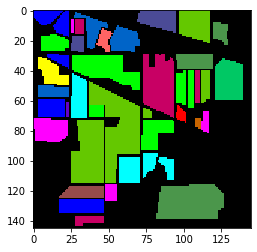

In [14]:
#ground truth map
gt = open_image('92AV3GT.GIS').read_band(0)
view = imshow(classes=gt)

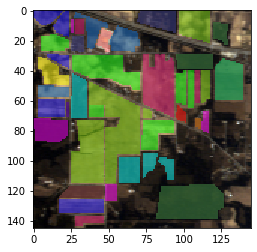

In [15]:
view = imshow(img,(30,20,10),classes=gt)
view.set_display_mode("overlay")
view.class_alpha = 0.5

# PART 2

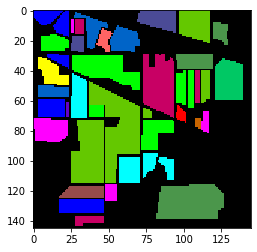

In [24]:
gt = open_image('92AV3GT.GIS').read_band(0)
v = imshow(classes=gt)

In [25]:
classes = create_training_classes(img,gt)

In [26]:
#Gaussian Maximum Likelihood classification

gmlc = GaussianClassifier(classes)

spectral:INFO: Setting min samples to 220
spectral:WARNING: Omitting class   1 : only 54 samples present
spectral:WARNING: Omitting class   7 : only 26 samples present
spectral:WARNING: Omitting class   9 : only 20 samples present
spectral:WARNING: Omitting class  13 : only 212 samples present
spectral:WARNING: Omitting class  16 : only 95 samples present


Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  


Classifying image...  0.Classifying image...  4.Classifying image...  8.Classifying image... 12.Classifying image... 16.Classifying image... 20.Classifying image... 24.Classifying image... 28.Classifying image... 32.Classifying image... 36.Classifying image... 40.Classifying image... 44.Classifying image... 48.Classifying image... 52.Classifying image... 56.Classifying image... 60.Classifying image... 64.Classifying image... 68.Classifying image... 72.Classifying image... 76.Classifying image... 80.Classifying image... 84.Classifying image... 88.Classifying image... 92.Classifying image... 96.Classifying image... 100.0Classifying image...done   


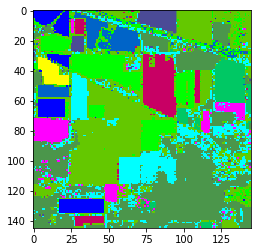

In [27]:
clmap = gmlc.classify_image(img)
v = imshow(classes=clmap)

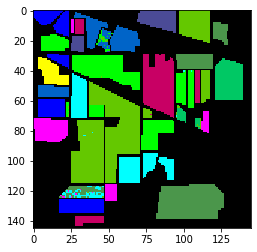

In [28]:
gtresults = clmap * (gt != 0)
v = imshow(classes=gtresults)

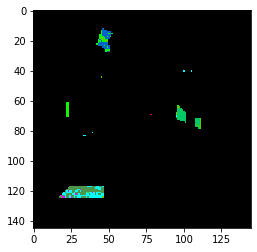

In [29]:
gterrors = gtresults * (gtresults != gt)
v = imshow(classes=gterrors)

Covariance.....  0.0Covariance.....  0.0Covariance.....  4.0Covariance.....  8.0Covariance..... 12.0Covariance..... 16.0Covariance..... 20.0Covariance..... 24.0Covariance..... 28.0Covariance..... 32.0Covariance..... 36.0Covariance..... 40.0Covariance..... 44.0Covariance..... 48.0Covariance..... 52.0Covariance..... 56.0Covariance..... 60.0Covariance..... 64.0Covariance..... 68.0Covariance..... 72.0Covariance..... 76.0Covariance..... 80.0Covariance..... 84.0Covariance..... 88.0Covariance..... 92.0Covariance..... 96.0Covariance.....done  


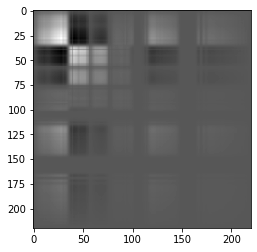

In [30]:
#Dimensionality Reduction

pc = principal_components(img)
v = imshow(pc.cov)

In [31]:
pc_0999 = pc.reduce(fraction=0.999)

len(pc_0999.eigenvalues)


32

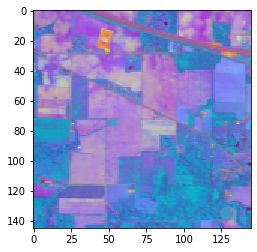

In [32]:
img_pc = pc_0999.transform(img)
v = imshow(img_pc[:,:,:3], stretch_all=True)

spectral:INFO: Setting min samples to 32
spectral:WARNING: Omitting class   7 : only 26 samples present
spectral:WARNING: Omitting class   9 : only 20 samples present


Covariance.....  0.0Covariance.....  0.0Covariance.....  1.9Covariance.....  3.7Covariance.....  5.6Covariance.....  7.4Covariance.....  9.3Covariance..... 11.1Covariance..... 13.0Covariance..... 14.8Covariance..... 16.7Covariance..... 18.5Covariance..... 20.4Covariance..... 22.2Covariance..... 24.1Covariance..... 25.9Covariance..... 27.8Covariance..... 29.6Covariance..... 31.5Covariance..... 33.3Covariance..... 35.2Covariance..... 37.0Covariance..... 38.9Covariance..... 40.7Covariance..... 42.6Covariance..... 44.4Covariance..... 46.3Covariance..... 48.1Covariance..... 50.0Covariance..... 51.9Covariance..... 53.7Covariance..... 55.6Covariance..... 57.4Covariance..... 59.3Covariance..... 61.1Covariance..... 63.0Covariance..... 64.8Covariance..... 66.7Covariance..... 68.5Covariance..... 70.4Covariance..... 72.2Covariance..... 74.1Covariance..... 75.9Covariance..... 77.8Covariance..... 79.6Covariance..... 81.5Covariance..... 83.3Covariance..... 85.2Covariance..... 87.0Covariance..... 88.9

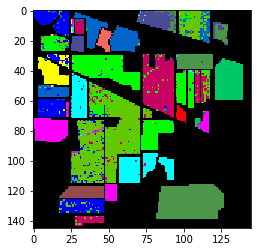

In [33]:
classes = create_training_classes(img_pc, gt)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(img_pc)
clmap_training = clmap * (gt != 0)
v = imshow(classes=clmap_training)

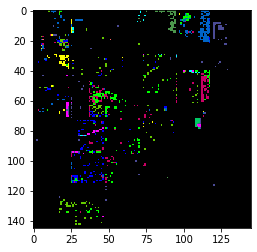

In [34]:
training_errors = clmap_training * (clmap_training != gt)
v = imshow(classes=training_errors)

In [35]:
#Fisher Linear Discriminant Algorithm

classes = create_training_classes(img, gt)
fld = linear_discriminant(classes)
len(fld.eigenvectors)

Covariance.....  0.0Covariance.....  0.0Covariance.....  1.9Covariance.....  3.7Covariance.....  5.6Covariance.....  7.4Covariance.....  9.3Covariance..... 11.1Covariance..... 13.0Covariance..... 14.8Covariance..... 16.7Covariance..... 18.5Covariance..... 20.4Covariance..... 22.2Covariance..... 24.1Covariance..... 25.9Covariance..... 27.8Covariance..... 29.6Covariance..... 31.5Covariance..... 33.3Covariance..... 35.2Covariance..... 37.0Covariance..... 38.9Covariance..... 40.7Covariance..... 42.6Covariance..... 44.4Covariance..... 46.3Covariance..... 48.1Covariance..... 50.0Covariance..... 51.9Covariance..... 53.7Covariance..... 55.6Covariance..... 57.4Covariance..... 59.3Covariance..... 61.1Covariance..... 63.0Covariance..... 64.8Covariance..... 66.7Covariance..... 68.5Covariance..... 70.4Covariance..... 72.2Covariance..... 74.1Covariance..... 75.9Covariance..... 77.8Covariance..... 79.6Covariance..... 81.5Covariance..... 83.3Covariance..... 85.2Covariance..... 87.0Covariance..... 88.9

220

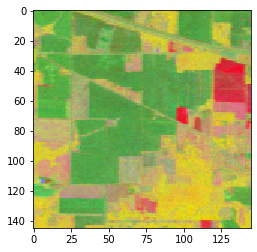

In [36]:
img_fld = fld.transform(img)
v = imshow(img_fld[:,:,:3])

spectral:INFO: Setting min samples to 15


Classifying image...  0.Classifying image...  4.Classifying image...  8.Classifying image... 12.Classifying image... 16.Classifying image... 20.Classifying image... 24.Classifying image... 28.Classifying image... 32.Classifying image... 36.Classifying image... 40.Classifying image... 44.Classifying image... 48.Classifying image... 52.Classifying image... 56.Classifying image... 60.Classifying image... 64.Classifying image... 68.Classifying image... 72.Classifying image... 76.Classifying image... 80.Classifying image... 84.Classifying image... 88.Classifying image... 92.Classifying image... 96.Classifying image... 100.0Classifying image...done   


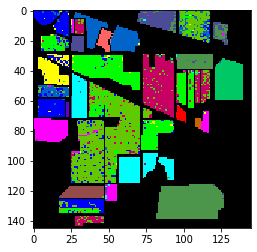

In [37]:
classes.transform(fld.transform)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(img_fld)
clmap_training = clmap * (gt != 0)
v = imshow(classes=clmap_training)

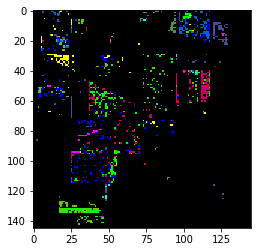

In [38]:
fld_errors = clmap_training * (clmap_training != gt)
v = imshow(classes=fld_errors)